<a href="https://colab.research.google.com/github/DreamRunnerMoshi/sixthsense/blob/master/personal_finance_data_visualization_and_descision_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U -q PyDrive pymc3

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
import pandas as pd

data_set = pd.read_csv('/content/personal_transactions.csv')
data_set.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,1/1/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,1/2/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,1/2/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,1/3/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,1/4/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [ ]:
data_set.Category

0                 Shopping
1          Mortgage & Rent
2              Restaurants
3      Credit Card Payment
4            Movies & DVDs
              ...         
801               Paycheck
802             Gas & Fuel
803             Gas & Fuel
804           Coffee Shops
805               Internet
Name: Category, Length: 806, dtype: object

In [ ]:
#categories
categories= data_set.Category.unique()
fig, ax = plt.subplots()
ax.plot(activity, dog, label="Category")

array(['Shopping', 'Mortgage & Rent', 'Restaurants',
       'Credit Card Payment', 'Movies & DVDs', 'Home Improvement',
       'Utilities', 'Music', 'Mobile Phone', 'Gas & Fuel', 'Groceries',
       'Paycheck', 'Fast Food', 'Coffee Shops', 'Internet', 'Haircut',
       'Alcohol & Bars', 'Auto Insurance', 'Entertainment',
       'Food & Dining', 'Television', 'Electronics & Software'],
      dtype=object)

In [7]:
data_set['Account Name'].unique()

array(['Platinum Card', 'Checking', 'Silver Card'], dtype=object)

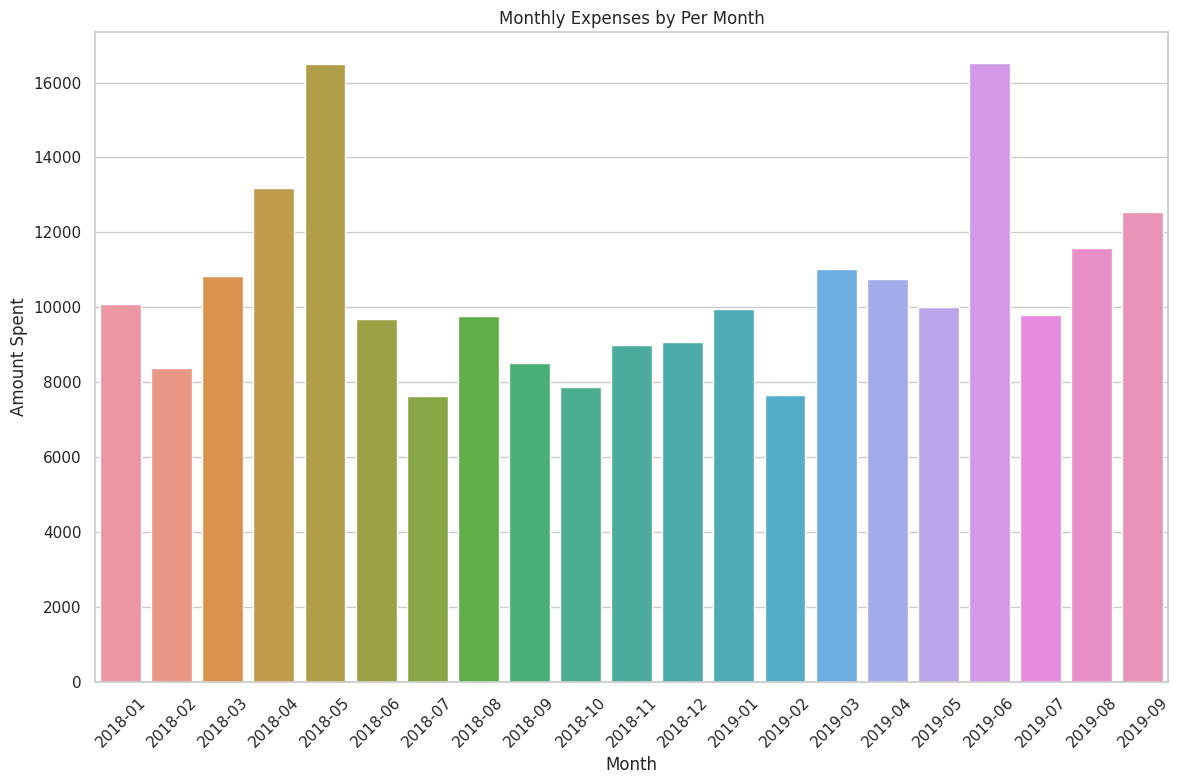

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns: 'Date', 'Category', 'Amount'
# Make sure 'Date' is in datetime format

df = pd.DataFrame(data_set)
# Extract month and year from the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and category and sum the amounts
monthly_expenses = df.groupby(['Month'])['Amount'].sum().reset_index()

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Amount', data=monthly_expenses)
plt.title('Monthly Expenses by Per Month')
plt.xlabel('Month')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


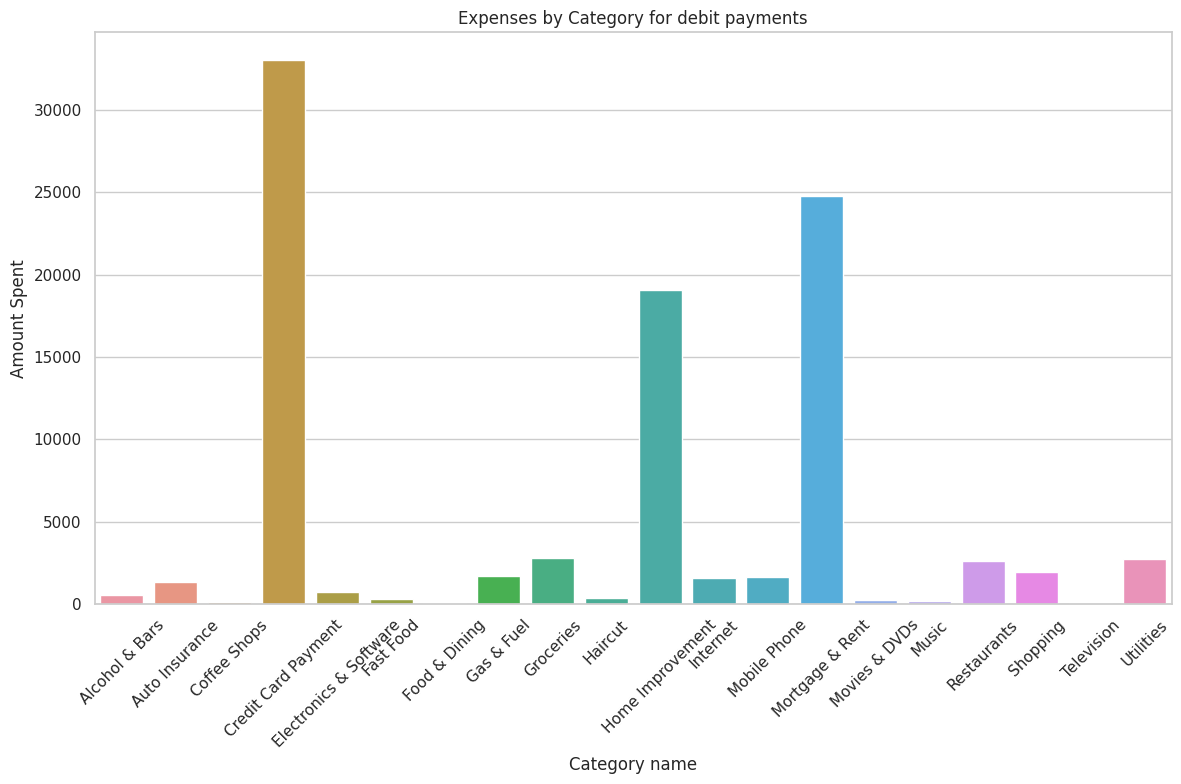

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns: 'Date', 'Category', 'Amount'
# Make sure 'Date' is in datetime format

df = pd.DataFrame(data_set)
debit_df = df[df['Transaction Type'] == 'debit']
# Group by month and category and sum the amounts
monthly_expenses = debit_df.groupby(['Category'])['Amount'].sum().reset_index()

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Amount', data=monthly_expenses)
plt.title('Expenses by Category for debit payments')
plt.xlabel('Category name', loc = 'center')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(data_set)
df['Month'] = pd.to_datetime(df['Date'])

In [11]:
data_set.Date = pd.to_datetime(data_set.Date)
data_set.head()

,Date,Description,Amount,Transaction Type,Category,Account Name,Month
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,2018-01
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,2018-01
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,2018-01
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,2018-01
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,2018-01


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              806 non-null    datetime64[ns]
 1   Description       806 non-null    object        
 2   Amount            806 non-null    float64       
 3   Transaction Type  806 non-null    object        
 4   Category          806 non-null    object        
 5   Account Name      806 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 37.9+ KB


In [12]:
debits = data_set[data_set["Transaction Type"] == 'debit']

In [13]:
credits = data_set[data_set["Transaction Type"] == 'credit']

In [17]:
def count_sum(data ,column: str, plot = "Scatter"):
    by_column = data\
                .groupby(column)\
                .agg({"Transaction Type": "count", "Amount": "sum"})\
                .rename(columns={"Transaction Type": "Total"})\
                .reset_index()
    by_column.columns = [column, "Total", "Sum"]

    labels = by_column[column]

    fig = None


    if plot == 'Scatter':
        fig = make_subplots(1, 2,
                    subplot_titles=['Sum', 'Total'])
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Sum"],
                name="Sum"
            ),
        1, 1)
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Total"],
                name="Total"
            ),
        1, 2)


    fig.update_layout(title_text=f"{column} Analysis")
    fig.show()

    return by_column

In [18]:
#visualize spending by category Debits.
gastos_by_cat = count_sum(debits, "Category")
gastos_by_cat

,Category,Total,Sum
0,Alcohol & Bars,25,539.13
1,Auto Insurance,18,1350.00
2,Coffee Shops,31,115.54
3,Credit Card Payment,71,33041.36
4,Electronics & Software,4,719.00
5,Fast Food,16,330.63
6,Food & Dining,2,77.75
7,Gas & Fuel,52,1715.17
8,Groceries,105,2795.21
9,Haircut,13,378.00


In [19]:
credit_by_cat = count_sum(credits, "Category")
gastos_by_cat

,Category,Total,Sum
0,Alcohol & Bars,25,539.13
1,Auto Insurance,18,1350.00
2,Coffee Shops,31,115.54
3,Credit Card Payment,71,33041.36
4,Electronics & Software,4,719.00
5,Fast Food,16,330.63
6,Food & Dining,2,77.75
7,Gas & Fuel,52,1715.17
8,Groceries,105,2795.21
9,Haircut,13,378.00


In [20]:
#visualizing spending by Account
gastos_by_payment_way = count_sum(debits, "Account Name")
gastos_by_payment_way

,Account Name,Total,Sum
0,Checking,218,82498.14
1,Platinum Card,324,8996.31
2,Silver Card,146,4589.33


In [21]:
#Spending by debits per day
gastos_by_date = count_sum(debits, "Date", plot="Scatter")
gastos_by_date

,Date,Total,Sum
0,2018-01-01,1,11.11
1,2018-01-02,2,1271.66
2,2018-01-04,1,11.76
3,2018-01-05,1,25.85
4,2018-01-06,1,18.45
...,...,...,...
404,2019-09-19,2,43.56
405,2019-09-22,1,131.10
406,2019-09-23,3,61.77
407,2019-09-28,2,37.73


In [ ]:
#Spending by credit per day
credit_spending = count_sum(credits, "Date", plot="Scatter")
credit_spending

,Date,Total,Sum
0,2018-01-03,1,2298.09
1,2018-01-12,1,2000.00
2,2018-01-19,1,2000.00
3,2018-01-22,2,864.80
4,2018-02-02,1,2000.00
...,...,...,...
95,2019-09-13,1,2250.00
96,2019-09-16,1,90.57
97,2019-09-17,1,186.13
98,2019-09-20,1,9.43


**Income analysis: Income data is stored as credit in datase**

In [ ]:
credits = data_set[data_set["Transaction Type"] == 'credit']

In [ ]:
#Income by account name
income_by_account = count_sum(credits, "Account Name")
income_by_account

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.DataFrame(data_set)

df['Date'] = df[('Date')].values.astype("float64")
df['Description'] = LabelEncoder().fit_transform(df['Description'])
df['Transaction Type'] = LabelEncoder().fit_transform(df['Transaction Type'])
df['Category'] = LabelEncoder().fit_transform(df['Category'])
df['Account Name'] = LabelEncoder().fit_transform(df['Account Name'])

print(df['Transaction Type'])
# Extract features and target variable
X = df[['Amount', 'Transaction Type', 'Date', 'Account Name', 'Description']]
y = df['Category']
print(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train_encoded)

# Make predictions on the testing set
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, predictions)
conf_matrix = confusion_matrix(y_test_encoded, predictions)
classification_rep = classification_report(y_test_encoded, predictions)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Now you can use the trained model for predicting new transactions
# Ensure to preprocess new data in the same way as the training data


0      1
1      1
2      1
3      0
4      1
      ..
801    0
802    1
803    1
804    1
805    1
Name: Transaction Type, Length: 806, dtype: int64
      Amount  Transaction Type          Date  Account Name  Description
0      11.11                 1  1.514765e+18             1            0
1    1247.44                 1  1.514851e+18             0           42
2      24.22                 1  1.514851e+18             2           60
3    2298.09                 0  1.514938e+18             1           20
4      11.76                 1  1.515024e+18             1           44
..       ...               ...           ...           ...          ...
801  2250.00                 0  1.569542e+18             0            9
802    33.46                 1  1.569629e+18             1            4
803     4.27                 1  1.569629e+18             1           52
804     1.75                 1  1.569802e+18             1           55
805    75.00                 1  1.569802e+18             0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
from sklearn.metrics import mean_squared_error
# Make predictions on the testing set
predictions = svm_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, predictions)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 40.41
